In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

from statsforecast.models import SeasonalNaive

c:\Users\user\miniconda3\envs\statsforecast\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
df = pd.read_csv('data/precios.csv')
df

,Tiempo,CENTRO,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1/1/18 1:00,648.23,NaN,NaN,NaN
1,1/1/18 2:00,623.03,NaN,NaN,NaN
2,1/1/18 3:00,614.86,NaN,NaN,NaN
3,1/1/18 4:00,593.24,NaN,NaN,NaN
4,1/1/18 5:00,560.30,NaN,NaN,NaN
...,...,...,...,...,...
8754,12/31/18 19:00,1389.55,NaN,NaN,NaN
8755,12/31/18 20:00,1364.57,NaN,NaN,NaN
8756,12/31/18 21:00,1368.99,NaN,NaN,NaN
8757,12/31/18 22:00,1330.88,NaN,NaN,NaN


In [3]:
df = df[['Tiempo', 'CENTRO']]
df

,Tiempo,CENTRO
0,1/1/18 1:00,648.23
1,1/1/18 2:00,623.03
2,1/1/18 3:00,614.86
3,1/1/18 4:00,593.24
4,1/1/18 5:00,560.30
...,...,...
8754,12/31/18 19:00,1389.55
8755,12/31/18 20:00,1364.57
8756,12/31/18 21:00,1368.99
8757,12/31/18 22:00,1330.88


In [4]:
values = df.loc[:8758 - 24 * 5, 'CENTRO'].values

In [5]:
model = SeasonalNaive(season_length=24)
model = model.fit(y=values)
y_hat_dict = model.predict(h = 24 * 5)
y_hat_dict['mean']

array([ 952.32,  676.55,  652.47,  648.04,  631.92,  632.88,  649.09,
        661.18,  733.59,  887.08, 1310.63, 1438.82, 1481.53, 1476.08,
       1506.07, 1475.37, 1616.63, 1587.17, 1594.07, 1750.1 , 1925.26,
       1931.17, 1909.96, 1541.74,  952.32,  676.55,  652.47,  648.04,
        631.92,  632.88,  649.09,  661.18,  733.59,  887.08, 1310.63,
       1438.82, 1481.53, 1476.08, 1506.07, 1475.37, 1616.63, 1587.17,
       1594.07, 1750.1 , 1925.26, 1931.17, 1909.96, 1541.74,  952.32,
        676.55,  652.47,  648.04,  631.92,  632.88,  649.09,  661.18,
        733.59,  887.08, 1310.63, 1438.82, 1481.53, 1476.08, 1506.07,
       1475.37, 1616.63, 1587.17, 1594.07, 1750.1 , 1925.26, 1931.17,
       1909.96, 1541.74,  952.32,  676.55,  652.47,  648.04,  631.92,
        632.88,  649.09,  661.18,  733.59,  887.08, 1310.63, 1438.82,
       1481.53, 1476.08, 1506.07, 1475.37, 1616.63, 1587.17, 1594.07,
       1750.1 , 1925.26, 1931.17, 1909.96, 1541.74,  952.32,  676.55,
        652.47,  648

In [6]:
df.loc[8758 - 24 * 5 + 1:, 'pred'] = y_hat_dict['mean']

C:\Users\user\AppData\Local\Temp\ipykernel_16584\1056956050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[8758 - 24 * 5 + 1:, 'pred'] = y_hat_dict['mean']


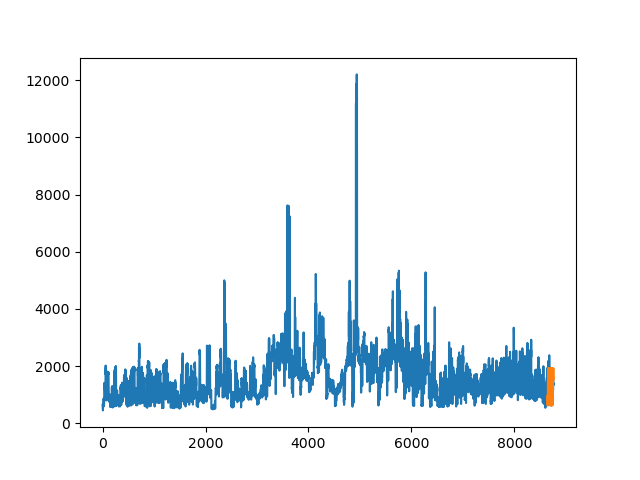

In [7]:
plt.figure()
plt.plot(df['CENTRO'])
plt.plot(df['pred'])
plt.show()

In [8]:
from statsforecast.models import MSTL
from statsforecast.models import AutoARIMA
from statsforecast.models import AutoETS

In [9]:
# Predecir doce horas
values = df.loc[8758 - 24 * 2:8758 - 12, 'CENTRO'].values

In [10]:
mstl_model = AutoARIMA(season_length=24, num_cores = 8)
mstl_model = mstl_model.fit(y=values)

In [11]:
y_hat_dict = mstl_model.predict(h=12)
y_hat_dict

{'mean': array([1498.24574663, 1534.73557667, 1533.12619767, 1510.22240214,
        1475.73253131, 1435.25494109, 1392.00799481, 1347.83219737,
        1303.77069069, 1260.40549997, 1218.0522902 , 1176.87316041])}

In [12]:
df.loc[8758 - 12 + 1:, 'arim'] = y_hat_dict['mean']

C:\Users\user\AppData\Local\Temp\ipykernel_16584\1389718968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[8758 - 12 + 1:, 'arim'] = y_hat_dict['mean']


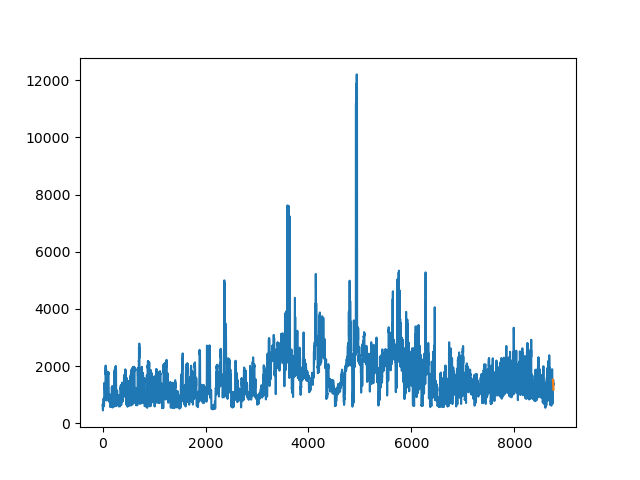

In [13]:
plt.figure()
plt.plot(df['CENTRO'])
# plt.plot(df['pred'])
plt.plot(df['arim'])
plt.show()